# I. Import libraries.<br>
<p>Sử dụng các thư viện để xử lý dữ liệu như:
    <ul>
        <li>pandas: Xử lý dữ liệu với file csv.</li>
        <li>matplotlib: Trực quan hóa dữ liệu.</li>
        <li>Seaborn: Trực quan hóa dữ liệu.</li>
        <li>Time: Chuyển đổi dữ liệu dạng chuỗi thành dạng timestamp.</li>
        <li>re: Là thư viện regex cho phép xử lý chuỗi ở dạng tổng quát nhất.</li>
        <li>os: Cho phép import file theo đường dẫn.</li>
    </ul></p>

In [157]:
import pandas as pd
import os
import re
import time
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()

In [2]:
import os,glob
folder_path = 'C:\\Users\\ACER\\Downloads\\archive'
for filename in glob.glob(os.path.join(folder_path, '*.csv')):
  with open(filename, 'r', encoding= 'utf-8') as f:
    text = f.read()
    print ('File Name: ', filename)
    print ("length file: ", len(text))
    print("=============================\n")

File Name:  C:\Users\ACER\Downloads\archive\nodes.csv
length file:  19444470

File Name:  C:\Users\ACER\Downloads\archive\powerBi_data.csv
length file:  11398817

File Name:  C:\Users\ACER\Downloads\archive\segments.csv
length file:  9923517

File Name:  C:\Users\ACER\Downloads\archive\segment_status.csv
length file:  3579383

File Name:  C:\Users\ACER\Downloads\archive\streets.csv
length file:  184140

File Name:  C:\Users\ACER\Downloads\archive\train.csv
length file:  4852159



<h1>About dataset.</h1>
    <p> Bộ dữ liệu được thu thập từ Reseach group from HCM city university of technology. Bộ dữ liệu nói về lưu lượng xe ở các đoạn 
        đường ở thành phố HCM theo từng các khoảng thời gian khác nhau.
    </p>

<p>Bộ dữ liệu bao gồm các phần như sau:<br>
    <ul>
        <li>
            <p>
                Node: Các vị trí trên các đoạn đường bao gồm điểm bắt đầu và điểm kết thúc của đoạn đường. Trong đó:
            </p>
            <p>
                <ul>
                    <li>
                        ID: Là điểm bắt đầu hoặc là điểm kết thúc của đoạn đường.
                    </li>
                    <li>
                        Lat: Là kinh độ của điểm bắt đầu hoặc điểm kết thúc của đoạn đường.
                    </li>
                    <li>
                        Long: Là vĩ độ của điểm bắt đầu hoặc là điểm kết thúc của đoạn đường.
                    </li>
                </ul>
            </p>
        </li>
        <li>
            <p>Segment: Là thông tin chi tiết về đoạn đường bao gồm: Tọa độ, thời điểm cập nhật, vận tốc tối đa, độ dài của đoạn đường, tên đường, cấp độ đường, kiểu đường.</p>
        </li>
        <li>
            <p>Segment_status: Là trạng thái về lưu lượng xe trên đoạn đường bao gồm thời gian tại thời điểm cập nhật, vận tốc được cập nhật.</p>
        </li>
        <li>
            <p>Street: Là thông tin về đoạn đường, bao gồm vận tốc tối đa, tên đoạn đường, loại hình của đoạn đường đó.</p>
        </li>
    </ul>
</p>

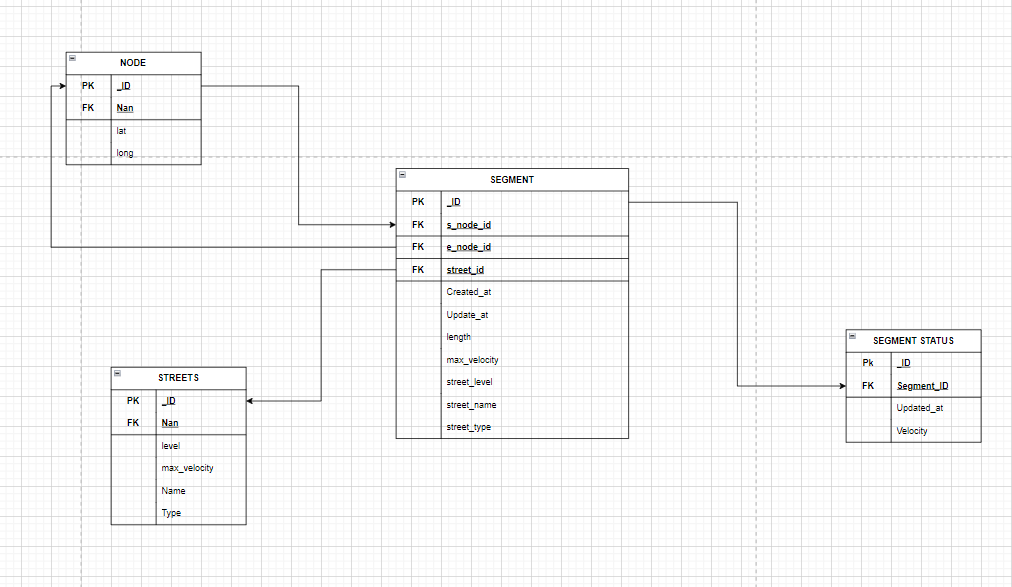

<h1>Problem.</h1>
<p>Vấn đề tắc nghẽn giao thông là một trong những vấn đề chính trong việc đưa ra quyết định giải quyết ở các thành phố lớn. Vấn đề tắc nghẽn giao thông có tác động đến xã hội, thương mại và phát triển ở các khu đô thị.</p>
<p>
    Trong bài đề tài nhóm nghiên cứu đưa ra các giải pháp ngắn hạn và các giải pháp dài hạn đề xuất giải quyết tình trạng tắc nghẽn giao thông. Đồng thời dự đoán tình trạng kẹt xe trong tương lai.
</p>

<h1>Problem solution.</h1>
<h2>Analysis.</h2>
<p>Trong vấn đề này nhóm nghiên cứu phân tích về các khía cạnh sau:</p>
<ul>
    <li>Thời điểm kẹt xe trong tuần vào thứ mấy.</li>
    <li>Liệu rằng các thời điểm kẹt xe trong ngày có như nhau hay không.</li>
    <li>Các địa điểm kẹt xe thường ở đâu. (chỗ giao đường, ở trường học, ở chợ....)</li>
    <li>Tình trạng kẹt xe thường xảy ra với các kiểu đường nào vd: trunk, unclassified, tertiary, secondary, primary_link, 
        primary, trunk_link, tertiary_link, secondary_link, motorway_link, motorway</li>
    <li>So sánh liệu street_level có ảnh hướng đến vận tốc không. Nếu có thì nó ảnh hưởng như thế nào vd: Vào giờ cao điểm...</li>
    <h2>Solution.</h2>
    <p>short term solution: Vào các giờ cao điểm thì các ngã tư, ngã ba ở đèn đỏ sẽ không sử dụng thay vào đó là đèn vàng. Và bố trí nhân viên điều tiết giao thông ở đó.<br>
    long term solution: Thay đổi khung giờ giữa người đi làm và người đi học. Khuyến khích người đi làm đi bằng tàu điện khi được hoàn thành hoặc xe buýt. Di tản dân cư...</p>
</ul>

# II. Read files csv

In [3]:
node = pd.read_csv('C:\\Users\\ACER\\Downloads\\archive\\nodes.csv')
segment = pd.read_csv('C:\\Users\\ACER\\Downloads\\archive\\segments.csv')
segment_status = pd.read_csv('C:\\Users\\ACER\\Downloads\\archive\\segment_status.csv')
streets = pd.read_csv('C:\\Users\\ACER\\Downloads\\archive\\streets.csv')
train = pd.read_csv('C:\\Users\\ACER\\Downloads\\archive\\train.csv')

In [4]:
node.head()

_id        long        lat
0  366367223  106.629056  10.804243
1  366367233  106.709701  10.771110
2  366367242  106.737189  10.709337
3  366367274  106.760081  10.854489
4  366367285  106.721163  10.804994

In [5]:
node.columns

Index(['_id', 'long', 'lat'], dtype='object')

Bảng thể hiện các vị trí điểm bắt đầu và điểm kết thúc trên phân đoạn đường.

In [6]:
# Overview data segment
segment.head()

_id                created_at                updated_at   s_node_id  \
0    0  2020-10-18T13:26:17.365Z  2020-10-18T13:26:17.365Z   373543511   
1    1  2020-10-18T13:26:17.400Z  2020-10-18T13:26:17.400Z  5468660805   
2    2  2020-10-18T13:26:17.435Z  2020-10-18T13:26:17.435Z  5738158916   
3    3  2020-10-18T13:26:17.444Z  2020-10-18T13:26:17.444Z  5738158918   
4    4  2020-10-18T13:26:17.452Z  2020-10-18T13:26:17.452Z  5738158912   

    e_node_id  length  street_id  max_velocity  street_level street_name  \
0  5468660805     114   31096786          80.0             1   Quốc Lộ 1   
1  5738158916       9   31096786          80.0             1   Quốc Lộ 1   
2  5738158918      23   31096786          80.0             1   Quốc Lộ 1   
3  5738158912      66   31096786          80.0             1   Quốc Lộ 1   
4  5758104203     127   31096786          80.0             1   Quốc Lộ 1   

  street_type  
0       trunk  
1       trunk  
2       trunk  
3       trunk  
4       trunk

In [7]:
segment.columns

Index(['_id', 'created_at', 'updated_at', 's_node_id', 'e_node_id', 'length',
       'street_id', 'max_velocity', 'street_level', 'street_name',
       'street_type'],
      dtype='object')

In [8]:
segment['created_at'].unique()[:10]

array(['2020-10-18T13:26:17.365Z', '2020-10-18T13:26:17.400Z',
       '2020-10-18T13:26:17.435Z', '2020-10-18T13:26:17.444Z',
       '2020-10-18T13:26:17.452Z', '2020-10-18T13:26:17.461Z',
       '2020-10-18T13:26:17.468Z', '2020-10-18T13:26:17.472Z',
       '2020-10-18T13:26:17.477Z', '2020-10-18T13:26:17.481Z'],
      dtype=object)

+ id: segment<br>
+ created_at: tạo tại thời điểm.<br>
+ update_at: cập nhật tại thời điểm<br>

In [9]:
# Overview data segment status.
segment_status.head()

_id                updated_at  segment_id  velocity
0    0  2020-07-03T14:55:31.869Z       24845        20
1    1  2020-07-03T15:02:56.048Z       33923        10
2    2  2020-07-04T08:15:52.696Z       33824         5
3    3  2020-07-04T08:15:59.903Z       33824         5
4    4  2020-07-04T08:16:08.201Z       33824         5

In [10]:
segment_status.columns

Index(['_id', 'updated_at', 'segment_id', 'velocity'], dtype='object')

trạng thái giao thông cho một phân khúc được báo cáo vào các ngày và thời gian khác nhau.

In [11]:
# OVerview data streets.
streets.head()

_id  level  max_velocity            name          type
0  31096786      1          80.0       Quốc Lộ 1         trunk
1  32575737      4           NaN             NaN  unclassified
2  32575794      4           NaN      Chu Văn An  unclassified
3  32575820      4           NaN   Nguyễn Văn Bá      tertiary
4  32575823      4           NaN  Nguyễn Thị Nhỏ      tertiary

In [12]:
streets.type.unique()

array(['trunk', 'unclassified', 'tertiary', 'secondary', 'primary_link',
       'primary', 'trunk_link', 'tertiary_link', 'secondary_link',
       'motorway_link', 'motorway'], dtype=object)

Nhiều phân khúc cùng nhau tạo thành một con đường trong thế giới thực, bảng chứa các chi tiết về tên đường phố, cấp độ, loại đường phố và vận tốc tối đa của nó khi dòng chảy tự do.

# Merge data.

In [13]:
node.head()

_id        long        lat
0  366367223  106.629056  10.804243
1  366367233  106.709701  10.771110
2  366367242  106.737189  10.709337
3  366367274  106.760081  10.854489
4  366367285  106.721163  10.804994

In [14]:
node.loc[node['_id'] == 5468660805,:]

_id        long        lat
278553  5468660805  106.601621  10.726701

In [15]:
segment.head()

_id                created_at                updated_at   s_node_id  \
0    0  2020-10-18T13:26:17.365Z  2020-10-18T13:26:17.365Z   373543511   
1    1  2020-10-18T13:26:17.400Z  2020-10-18T13:26:17.400Z  5468660805   
2    2  2020-10-18T13:26:17.435Z  2020-10-18T13:26:17.435Z  5738158916   
3    3  2020-10-18T13:26:17.444Z  2020-10-18T13:26:17.444Z  5738158918   
4    4  2020-10-18T13:26:17.452Z  2020-10-18T13:26:17.452Z  5738158912   

    e_node_id  length  street_id  max_velocity  street_level street_name  \
0  5468660805     114   31096786          80.0             1   Quốc Lộ 1   
1  5738158916       9   31096786          80.0             1   Quốc Lộ 1   
2  5738158918      23   31096786          80.0             1   Quốc Lộ 1   
3  5738158912      66   31096786          80.0             1   Quốc Lộ 1   
4  5758104203     127   31096786          80.0             1   Quốc Lộ 1   

  street_type  
0       trunk  
1       trunk  
2       trunk  
3       trunk  
4       trunk

In [16]:
df = pd.DataFrame()

In [17]:
df = segment.merge(node,left_on='s_node_id', right_on='_id')

In [18]:
df.head()

_id_x                created_at                updated_at   s_node_id  \
0      0  2020-10-18T13:26:17.365Z  2020-10-18T13:26:17.365Z   373543511   
1      1  2020-10-18T13:26:17.400Z  2020-10-18T13:26:17.400Z  5468660805   
2      2  2020-10-18T13:26:17.435Z  2020-10-18T13:26:17.435Z  5738158916   
3      3  2020-10-18T13:26:17.444Z  2020-10-18T13:26:17.444Z  5738158918   
4      4  2020-10-18T13:26:17.452Z  2020-10-18T13:26:17.452Z  5738158912   

    e_node_id  length  street_id  max_velocity  street_level street_name  \
0  5468660805     114   31096786          80.0             1   Quốc Lộ 1   
1  5738158916       9   31096786          80.0             1   Quốc Lộ 1   
2  5738158918      23   31096786          80.0             1   Quốc Lộ 1   
3  5738158912      66   31096786          80.0             1   Quốc Lộ 1   
4  5758104203     127   31096786          80.0             1   Quốc Lộ 1   

  street_type       _id_y        long        lat  
0       trunk   373543511  106.601780  10.727718  
1       trunk  5468660805  106.601621  10.726701  
2       trunk  5738158916  106.601607  10.726613  
3       trunk  5738158918  106.601574  10.726401  
4       trunk  5738158912  106.601481  10.725809

In [19]:
df = df.merge(node,left_on='e_node_id', right_on='_id')

In [20]:
df.head()

_id_x                created_at                updated_at   s_node_id  \
0      0  2020-10-18T13:26:17.365Z  2020-10-18T13:26:17.365Z   373543511   
1      1  2020-10-18T13:26:17.400Z  2020-10-18T13:26:17.400Z  5468660805   
2      2  2020-10-18T13:26:17.435Z  2020-10-18T13:26:17.435Z  5738158916   
3      3  2020-10-18T13:26:17.444Z  2020-10-18T13:26:17.444Z  5738158918   
4      4  2020-10-18T13:26:17.452Z  2020-10-18T13:26:17.452Z  5738158912   

    e_node_id  length  street_id  max_velocity  street_level street_name  \
0  5468660805     114   31096786          80.0             1   Quốc Lộ 1   
1  5738158916       9   31096786          80.0             1   Quốc Lộ 1   
2  5738158918      23   31096786          80.0             1   Quốc Lộ 1   
3  5738158912      66   31096786          80.0             1   Quốc Lộ 1   
4  5758104203     127   31096786          80.0             1   Quốc Lộ 1   

  street_type       _id_y      long_x      lat_x         _id      long_y  \
0       trunk   373543511  106.601780  10.727718  5468660805  106.601621   
1       trunk  5468660805  106.601621  10.726701  5738158916  106.601607   
2       trunk  5738158916  106.601607  10.726613  5738158918  106.601574   
3       trunk  5738158918  106.601574  10.726401  5738158912  106.601481   
4       trunk  5738158912  106.601481  10.725809  5758104203  106.601277   

       lat_y  
0  10.726701  
1  10.726613  
2  10.726401  
3  10.725809  
4  10.724676

In [21]:
segment_status.head()

_id                updated_at  segment_id  velocity
0    0  2020-07-03T14:55:31.869Z       24845        20
1    1  2020-07-03T15:02:56.048Z       33923        10
2    2  2020-07-04T08:15:52.696Z       33824         5
3    3  2020-07-04T08:15:59.903Z       33824         5
4    4  2020-07-04T08:16:08.201Z       33824         5

In [22]:
df.head()

_id_x                created_at                updated_at   s_node_id  \
0      0  2020-10-18T13:26:17.365Z  2020-10-18T13:26:17.365Z   373543511   
1      1  2020-10-18T13:26:17.400Z  2020-10-18T13:26:17.400Z  5468660805   
2      2  2020-10-18T13:26:17.435Z  2020-10-18T13:26:17.435Z  5738158916   
3      3  2020-10-18T13:26:17.444Z  2020-10-18T13:26:17.444Z  5738158918   
4      4  2020-10-18T13:26:17.452Z  2020-10-18T13:26:17.452Z  5738158912   

    e_node_id  length  street_id  max_velocity  street_level street_name  \
0  5468660805     114   31096786          80.0             1   Quốc Lộ 1   
1  5738158916       9   31096786          80.0             1   Quốc Lộ 1   
2  5738158918      23   31096786          80.0             1   Quốc Lộ 1   
3  5738158912      66   31096786          80.0             1   Quốc Lộ 1   
4  5758104203     127   31096786          80.0             1   Quốc Lộ 1   

  street_type       _id_y      long_x      lat_x         _id      long_y  \
0       trunk   373543511  106.601780  10.727718  5468660805  106.601621   
1       trunk  5468660805  106.601621  10.726701  5738158916  106.601607   
2       trunk  5738158916  106.601607  10.726613  5738158918  106.601574   
3       trunk  5738158918  106.601574  10.726401  5738158912  106.601481   
4       trunk  5738158912  106.601481  10.725809  5758104203  106.601277   

       lat_y  
0  10.726701  
1  10.726613  
2  10.726401  
3  10.725809  
4  10.724676

In [23]:
df = df.merge(segment_status, right_on='segment_id', left_on='_id_x')

C:\Users\ACER\AppData\Local\Temp\ipykernel_17472\320074532.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(segment_status, right_on='segment_id', left_on='_id_x')


In [24]:
df.columns

Index(['_id_x', 'created_at', 'updated_at_x', 's_node_id', 'e_node_id',
       'length', 'street_id', 'max_velocity', 'street_level', 'street_name',
       'street_type', '_id_y', 'long_x', 'lat_x', '_id_x', 'long_y', 'lat_y',
       '_id_y', 'updated_at_y', 'segment_id', 'velocity'],
      dtype='object')

In [25]:
df.head()

_id_x                created_at              updated_at_x   s_node_id  \
0  57954  2020-10-18T13:28:59.261Z  2020-10-18T13:28:59.261Z   696860119   
1   3673  2020-10-18T13:26:38.750Z  2020-10-18T13:26:38.750Z   366440329   
2     26  2020-10-18T13:26:17.551Z  2020-10-18T13:26:17.551Z   366428456   
3  47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
4  47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   

    e_node_id  length  street_id  max_velocity  street_level     street_name  \
0   366371920      30  408194034           NaN             4      Chu Văn An   
1   366450125      27   32578431           NaN             4   Nguyễn Văn Bá   
2   366416066     116   32575820           NaN             4   Nguyễn Văn Bá   
3  5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
4  5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   

   ...       _id_y      long_x      lat_x       _id_x      long_y      lat_y  \
0  ...   696860119  106.704566  10.811195   366371920  106.704842  10.811203   
1  ...   366440329  106.766766  10.838061   366450125  106.766903  10.838266   
2  ...   366428456  106.768732  10.841506   366416066  106.769254  10.842422   
3  ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
4  ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   

   _id_y              updated_at_y segment_id  velocity  
0  64760  2020-12-19T13:09:47.883Z      57954         8  
1  66661  2020-12-22T01:30:11.272Z       3673       116  
2  89252  2021-04-16T00:55:31.333Z         26       117  
3    904  2020-08-02T23:56:28.021Z      47420        12  
4   4513  2020-08-02T23:59:28.138Z      47420        34  

[5 rows x 21 columns]

## Định nghĩa:
### type:
+ unclassified: không có<br>
+ tertiary: là xa lộ. Tuyến đường này có thể nối giữa các khu vực định cư nhỏ và khu vực định cư lớn<br>
+ trunk: là một trục đường chính<br>
+ secondary: là tuyến đường có 2 làng trở lên. Nó cũng gần được coi là một tuyến đường chính<br>
+ primary: đây là tuyến đường chính nối giữa các trung tâm dân cư hoặc các khu kinh tế với nhau<br>
+ school:

In [26]:
df.head()

_id_x                created_at              updated_at_x   s_node_id  \
0  57954  2020-10-18T13:28:59.261Z  2020-10-18T13:28:59.261Z   696860119   
1   3673  2020-10-18T13:26:38.750Z  2020-10-18T13:26:38.750Z   366440329   
2     26  2020-10-18T13:26:17.551Z  2020-10-18T13:26:17.551Z   366428456   
3  47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
4  47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   

    e_node_id  length  street_id  max_velocity  street_level     street_name  \
0   366371920      30  408194034           NaN             4      Chu Văn An   
1   366450125      27   32578431           NaN             4   Nguyễn Văn Bá   
2   366416066     116   32575820           NaN             4   Nguyễn Văn Bá   
3  5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
4  5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   

   ...       _id_y      long_x      lat_x       _id_x      long_y      lat_y  \
0  ...   696860119  106.704566  10.811195   366371920  106.704842  10.811203   
1  ...   366440329  106.766766  10.838061   366450125  106.766903  10.838266   
2  ...   366428456  106.768732  10.841506   366416066  106.769254  10.842422   
3  ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
4  ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   

   _id_y              updated_at_y segment_id  velocity  
0  64760  2020-12-19T13:09:47.883Z      57954         8  
1  66661  2020-12-22T01:30:11.272Z       3673       116  
2  89252  2021-04-16T00:55:31.333Z         26       117  
3    904  2020-08-02T23:56:28.021Z      47420        12  
4   4513  2020-08-02T23:59:28.138Z      47420        34  

[5 rows x 21 columns]

In [27]:
df.head(15)

_id_x                created_at              updated_at_x   s_node_id  \
0   57954  2020-10-18T13:28:59.261Z  2020-10-18T13:28:59.261Z   696860119   
1    3673  2020-10-18T13:26:38.750Z  2020-10-18T13:26:38.750Z   366440329   
2      26  2020-10-18T13:26:17.551Z  2020-10-18T13:26:17.551Z   366428456   
3   47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
4   47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
5   47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
6   47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
7   47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
8   47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
9   47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
10  47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
11  47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
12  47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
13  47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   
14  47420  2020-10-18T13:28:30.470Z  2020-10-18T13:28:30.470Z  5765289877   

     e_node_id  length  street_id  max_velocity  street_level     street_name  \
0    366371920      30  408194034           NaN             4      Chu Văn An   
1    366450125      27   32578431           NaN             4   Nguyễn Văn Bá   
2    366416066     116   32575820           NaN             4   Nguyễn Văn Bá   
3   5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
4   5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
5   5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
6   5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
7   5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
8   5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
9   5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
10  5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
11  5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
12  5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
13  5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   
14  5765289876      18  304360842           NaN             4  Nguyễn Thị Nhỏ   

    ...       _id_y      long_x      lat_x       _id_x      long_y      lat_y  \
0   ...   696860119  106.704566  10.811195   366371920  106.704842  10.811203   
1   ...   366440329  106.766766  10.838061   366450125  106.766903  10.838266   
2   ...   366428456  106.768732  10.841506   366416066  106.769254  10.842422   
3   ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
4   ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
5   ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
6   ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
7   ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
8   ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
9   ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
10  ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
11  ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
12  ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
13  ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   
14  ...  5765289877  106.652513  10.769557  5765289876  106.652479  10.769398   

    _id_y              updated_at_y segment_id  velocity  
0   64760  2020-12-19T13:09:47.883Z      57954         8  
1   66661  2020-12-22T01:30:11.272Z       3673       116  


# Convert datatype

In [28]:
df['created_at']= pd.to_datetime(df['created_at'])
df['updated_at_x']= pd.to_datetime(df['updated_at_x'])
df['updated_at_y'] = pd.to_datetime(df['updated_at_y'])

In [29]:
df.head()

_id_x                       created_at                     updated_at_x  \
0  57954 2020-10-18 13:28:59.261000+00:00 2020-10-18 13:28:59.261000+00:00   
1   3673 2020-10-18 13:26:38.750000+00:00 2020-10-18 13:26:38.750000+00:00   
2     26 2020-10-18 13:26:17.551000+00:00 2020-10-18 13:26:17.551000+00:00   
3  47420 2020-10-18 13:28:30.470000+00:00 2020-10-18 13:28:30.470000+00:00   
4  47420 2020-10-18 13:28:30.470000+00:00 2020-10-18 13:28:30.470000+00:00   

    s_node_id   e_node_id  length  street_id  max_velocity  street_level  \
0   696860119   366371920      30  408194034           NaN             4   
1   366440329   366450125      27   32578431           NaN             4   
2   366428456   366416066     116   32575820           NaN             4   
3  5765289877  5765289876      18  304360842           NaN             4   
4  5765289877  5765289876      18  304360842           NaN             4   

      street_name  ...       _id_y      long_x      lat_x       _id_x  \
0      Chu Văn An  ...   696860119  106.704566  10.811195   366371920   
1   Nguyễn Văn Bá  ...   366440329  106.766766  10.838061   366450125   
2   Nguyễn Văn Bá  ...   366428456  106.768732  10.841506   366416066   
3  Nguyễn Thị Nhỏ  ...  5765289877  106.652513  10.769557  5765289876   
4  Nguyễn Thị Nhỏ  ...  5765289877  106.652513  10.769557  5765289876   

       long_y      lat_y  _id_y                     updated_at_y segment_id  \
0  106.704842  10.811203  64760 2020-12-19 13:09:47.883000+00:00      57954   
1  106.766903  10.838266  66661 2020-12-22 01:30:11.272000+00:00       3673   
2  106.769254  10.842422  89252 2021-04-16 00:55:31.333000+00:00         26   
3  106.652479  10.769398    904 2020-08-02 23:56:28.021000+00:00      47420   
4  106.652479  10.769398   4513 2020-08-02 23:59:28.138000+00:00      47420   

   velocity  
0         8  
1       116  
2       117  
3        12  
4        34  

[5 rows x 21 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90938 entries, 0 to 90937
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   _id_x         90938 non-null  int64              
 1   created_at    90938 non-null  datetime64[ns, UTC]
 2   updated_at_x  90938 non-null  datetime64[ns, UTC]
 3   s_node_id     90938 non-null  int64              
 4   e_node_id     90938 non-null  int64              
 5   length        90938 non-null  int64              
 6   street_id     90938 non-null  int64              
 7   max_velocity  8618 non-null   float64            
 8   street_level  90938 non-null  int64              
 9   street_name   90937 non-null  object             
 10  street_type   90938 non-null  object             
 11  _id_y         90938 non-null  int64              
 12  long_x        90938 non-null  float64            
 13  lat_x         90938 non-null  float64            
 14  _id_x 

In [31]:
df.max_velocity.value_counts()

60.0     3663
40.0     2039
80.0     1247
50.0      808
20.0      434
70.0      232
30.0      126
120.0      52
10.0       12
45.0        4
100.0       1
Name: max_velocity, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90938 entries, 0 to 90937
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   _id_x         90938 non-null  int64              
 1   created_at    90938 non-null  datetime64[ns, UTC]
 2   updated_at_x  90938 non-null  datetime64[ns, UTC]
 3   s_node_id     90938 non-null  int64              
 4   e_node_id     90938 non-null  int64              
 5   length        90938 non-null  int64              
 6   street_id     90938 non-null  int64              
 7   max_velocity  8618 non-null   float64            
 8   street_level  90938 non-null  int64              
 9   street_name   90937 non-null  object             
 10  street_type   90938 non-null  object             
 11  _id_y         90938 non-null  int64              
 12  long_x        90938 non-null  float64            
 13  lat_x         90938 non-null  float64            
 14  _id_x 

In [33]:
df.head()

_id_x                       created_at                     updated_at_x  \
0  57954 2020-10-18 13:28:59.261000+00:00 2020-10-18 13:28:59.261000+00:00   
1   3673 2020-10-18 13:26:38.750000+00:00 2020-10-18 13:26:38.750000+00:00   
2     26 2020-10-18 13:26:17.551000+00:00 2020-10-18 13:26:17.551000+00:00   
3  47420 2020-10-18 13:28:30.470000+00:00 2020-10-18 13:28:30.470000+00:00   
4  47420 2020-10-18 13:28:30.470000+00:00 2020-10-18 13:28:30.470000+00:00   

    s_node_id   e_node_id  length  street_id  max_velocity  street_level  \
0   696860119   366371920      30  408194034           NaN             4   
1   366440329   366450125      27   32578431           NaN             4   
2   366428456   366416066     116   32575820           NaN             4   
3  5765289877  5765289876      18  304360842           NaN             4   
4  5765289877  5765289876      18  304360842           NaN             4   

      street_name  ...       _id_y      long_x      lat_x       _id_x  \
0      Chu Văn An  ...   696860119  106.704566  10.811195   366371920   
1   Nguyễn Văn Bá  ...   366440329  106.766766  10.838061   366450125   
2   Nguyễn Văn Bá  ...   366428456  106.768732  10.841506   366416066   
3  Nguyễn Thị Nhỏ  ...  5765289877  106.652513  10.769557  5765289876   
4  Nguyễn Thị Nhỏ  ...  5765289877  106.652513  10.769557  5765289876   

       long_y      lat_y  _id_y                     updated_at_y segment_id  \
0  106.704842  10.811203  64760 2020-12-19 13:09:47.883000+00:00      57954   
1  106.766903  10.838266  66661 2020-12-22 01:30:11.272000+00:00       3673   
2  106.769254  10.842422  89252 2021-04-16 00:55:31.333000+00:00         26   
3  106.652479  10.769398    904 2020-08-02 23:56:28.021000+00:00      47420   
4  106.652479  10.769398   4513 2020-08-02 23:59:28.138000+00:00      47420   

   velocity  
0         8  
1       116  
2       117  
3        12  
4        34  

[5 rows x 21 columns]

In [34]:
df[['created_at', 'updated_at_x', 'updated_at_y']]

created_at                     updated_at_x  \
0     2020-10-18 13:28:59.261000+00:00 2020-10-18 13:28:59.261000+00:00   
1     2020-10-18 13:26:38.750000+00:00 2020-10-18 13:26:38.750000+00:00   
2     2020-10-18 13:26:17.551000+00:00 2020-10-18 13:26:17.551000+00:00   
3     2020-10-18 13:28:30.470000+00:00 2020-10-18 13:28:30.470000+00:00   
4     2020-10-18 13:28:30.470000+00:00 2020-10-18 13:28:30.470000+00:00   
...                                ...                              ...   
90933 2020-10-18 13:30:29.461000+00:00 2020-10-18 13:30:29.461000+00:00   
90934 2020-10-18 13:30:29.461000+00:00 2020-10-18 13:30:29.461000+00:00   
90935 2020-10-18 13:30:29.461000+00:00 2020-10-18 13:30:29.461000+00:00   
90936 2020-10-18 13:30:29.461000+00:00 2020-10-18 13:30:29.461000+00:00   
90937 2020-10-18 13:30:29.491000+00:00 2020-10-18 13:30:29.491000+00:00   

                          updated_at_y  
0     2020-12-19 13:09:47.883000+00:00  
1     2020-12-22 01:30:11.272000+00:00  
2     2021-04-16 00:55:31.333000+00:00  
3     2020-08-02 23:56:28.021000+00:00  
4     2020-08-02 23:59:28.138000+00:00  
...                                ...  
90933 2020-11-16 01:48:09.275000+00:00  
90934 2020-11-17 01:43:55.112000+00:00  
90935 2020-11-19 02:08:35.654000+00:00  
90936 2021-01-05 10:09:43.521000+00:00  
90937 2021-01-05 08:15:48.255000+00:00  

[90938 rows x 3 columns]

In [35]:
segment_status.head()

_id                updated_at  segment_id  velocity
0    0  2020-07-03T14:55:31.869Z       24845        20
1    1  2020-07-03T15:02:56.048Z       33923        10
2    2  2020-07-04T08:15:52.696Z       33824         5
3    3  2020-07-04T08:15:59.903Z       33824         5
4    4  2020-07-04T08:16:08.201Z       33824         5

In [36]:
segment

_id                created_at                updated_at   s_node_id  \
0          0  2020-10-18T13:26:17.365Z  2020-10-18T13:26:17.365Z   373543511   
1          1  2020-10-18T13:26:17.400Z  2020-10-18T13:26:17.400Z  5468660805   
2          2  2020-10-18T13:26:17.435Z  2020-10-18T13:26:17.435Z  5738158916   
3          3  2020-10-18T13:26:17.444Z  2020-10-18T13:26:17.444Z  5738158918   
4          4  2020-10-18T13:26:17.452Z  2020-10-18T13:26:17.452Z  5738158912   
...      ...                       ...                       ...         ...   
84628  84628  2020-10-18T13:30:29.795Z  2020-10-18T13:30:29.795Z  5778600776   
84629  84629  2020-10-18T13:30:29.797Z  2020-10-18T13:30:29.797Z   411925919   
84630  84630  2020-10-18T13:30:29.799Z  2020-10-18T13:30:29.799Z  3116310151   
84631  84631  2020-10-18T13:30:29.802Z  2020-10-18T13:30:29.802Z  5778360106   
84632  84632  2020-10-18T13:30:29.803Z  2020-10-18T13:30:29.803Z  5763168795   

        e_node_id  length  street_id  max_velocity  street_level street_name  \
0      5468660805     114   31096786          80.0             1   Quốc Lộ 1   
1      5738158916       9   31096786          80.0             1   Quốc Lộ 1   
2      5738158918      23   31096786          80.0             1   Quốc Lộ 1   
3      5738158912      66   31096786          80.0             1   Quốc Lộ 1   
4      5758104203     127   31096786          80.0             1   Quốc Lộ 1   
...           ...     ...        ...           ...           ...         ...   
84628   411925919      42  658328101           NaN             4  Võ Văn Tần   
84629  3116310151      39  658328101           NaN             4  Võ Văn Tần   
84630  5778360106      22  658328101           NaN             4  Võ Văn Tần   
84631  5763168795      37  658328101           NaN             4  Võ Văn Tần   
84632   411925922      74  658328101           NaN             4  Võ Văn Tần   

      street_type  
0           trunk  
1           trunk  
2           trunk  
3           trunk  
4           trunk  
...           ...  
84628    tertiary  
84629    tertiary  
84630    tertiary  
84631    tertiary  
84632    tertiary  

[84633 rows x 11 columns]

In [37]:
# df['year_create_at'] = df['created_at'].dt.year
df['month_create_at'] = df['created_at'].dt.month
# df['date_reate_at'] = df['created_at'].dt.day
df['hour_create_at'] = df['created_at'].dt.hour

In [38]:
df['month_create_at'].unique()

array([10], dtype=int64)

In [39]:
segment.shape

(84633, 11)

In [40]:
len(segment['created_at'].unique())

84633

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90938 entries, 0 to 90937
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   _id_x            90938 non-null  int64              
 1   created_at       90938 non-null  datetime64[ns, UTC]
 2   updated_at_x     90938 non-null  datetime64[ns, UTC]
 3   s_node_id        90938 non-null  int64              
 4   e_node_id        90938 non-null  int64              
 5   length           90938 non-null  int64              
 6   street_id        90938 non-null  int64              
 7   max_velocity     8618 non-null   float64            
 8   street_level     90938 non-null  int64              
 9   street_name      90937 non-null  object             
 10  street_type      90938 non-null  object             
 11  _id_y            90938 non-null  int64              
 12  long_x           90938 non-null  float64            
 13  lat_x           

In [42]:
df.head()

_id_x                       created_at                     updated_at_x  \
0  57954 2020-10-18 13:28:59.261000+00:00 2020-10-18 13:28:59.261000+00:00   
1   3673 2020-10-18 13:26:38.750000+00:00 2020-10-18 13:26:38.750000+00:00   
2     26 2020-10-18 13:26:17.551000+00:00 2020-10-18 13:26:17.551000+00:00   
3  47420 2020-10-18 13:28:30.470000+00:00 2020-10-18 13:28:30.470000+00:00   
4  47420 2020-10-18 13:28:30.470000+00:00 2020-10-18 13:28:30.470000+00:00   

    s_node_id   e_node_id  length  street_id  max_velocity  street_level  \
0   696860119   366371920      30  408194034           NaN             4   
1   366440329   366450125      27   32578431           NaN             4   
2   366428456   366416066     116   32575820           NaN             4   
3  5765289877  5765289876      18  304360842           NaN             4   
4  5765289877  5765289876      18  304360842           NaN             4   

      street_name  ...      lat_x       _id_x      long_y      lat_y  _id_y  \
0      Chu Văn An  ...  10.811195   366371920  106.704842  10.811203  64760   
1   Nguyễn Văn Bá  ...  10.838061   366450125  106.766903  10.838266  66661   
2   Nguyễn Văn Bá  ...  10.841506   366416066  106.769254  10.842422  89252   
3  Nguyễn Thị Nhỏ  ...  10.769557  5765289876  106.652479  10.769398    904   
4  Nguyễn Thị Nhỏ  ...  10.769557  5765289876  106.652479  10.769398   4513   

                      updated_at_y  segment_id  velocity month_create_at  \
0 2020-12-19 13:09:47.883000+00:00       57954         8              10   
1 2020-12-22 01:30:11.272000+00:00        3673       116              10   
2 2021-04-16 00:55:31.333000+00:00          26       117              10   
3 2020-08-02 23:56:28.021000+00:00       47420        12              10   
4 2020-08-02 23:59:28.138000+00:00       47420        34              10   

   hour_create_at  
0              13  
1              13  
2              13  
3              13  
4              13  

[5 rows x 23 columns]

In [43]:
df.columns

Index(['_id_x', 'created_at', 'updated_at_x', 's_node_id', 'e_node_id',
       'length', 'street_id', 'max_velocity', 'street_level', 'street_name',
       'street_type', '_id_y', 'long_x', 'lat_x', '_id_x', 'long_y', 'lat_y',
       '_id_y', 'updated_at_y', 'segment_id', 'velocity', 'month_create_at',
       'hour_create_at'],
      dtype='object')

In [44]:
df[['updated_at_x', 'length', 'street_name', 'length', 
    'max_velocity', 'street_level', 'street_type', 'long_x', 'lat_x',
     'long_y', 'lat_y', 'updated_at_y', 'velocity']]

updated_at_x  length           street_name  length  \
0     2020-10-18 13:28:59.261000+00:00      30            Chu Văn An      30   
1     2020-10-18 13:26:38.750000+00:00      27         Nguyễn Văn Bá      27   
2     2020-10-18 13:26:17.551000+00:00     116         Nguyễn Văn Bá     116   
3     2020-10-18 13:28:30.470000+00:00      18        Nguyễn Thị Nhỏ      18   
4     2020-10-18 13:28:30.470000+00:00      18        Nguyễn Thị Nhỏ      18   
...                                ...     ...                   ...     ...   
90933 2020-10-18 13:30:29.461000+00:00      48        Trần Quốc Thảo      48   
90934 2020-10-18 13:30:29.461000+00:00      48        Trần Quốc Thảo      48   
90935 2020-10-18 13:30:29.461000+00:00      48        Trần Quốc Thảo      48   
90936 2020-10-18 13:30:29.461000+00:00      48        Trần Quốc Thảo      48   
90937 2020-10-18 13:30:29.491000+00:00      13  Nguyễn Thị Minh Khai      13   

       max_velocity  street_level   street_type      long_x      lat_x  \
0               NaN             4  unclassified  106.704566  10.811195   
1               NaN             4      tertiary  106.766766  10.838061   
2               NaN             4      tertiary  106.768732  10.841506   
3               NaN             4      tertiary  106.652513  10.769557   
4               NaN             4      tertiary  106.652513  10.769557   
...             ...           ...           ...         ...        ...   
90933           NaN             4      tertiary  106.689519  10.780254   
90934           NaN             4      tertiary  106.689519  10.780254   
90935           NaN             4      tertiary  106.689519  10.780254   
90936           NaN             4      tertiary  106.689519  10.780254   
90937           NaN             2       primary  106.704503  10.789614   

           long_y      lat_y                     updated_at_y  velocity  
0      106.704842  10.811203 2020-12-19 13:09:47.883000+00:00         8  
1      106.766903  10.838266 2020-12-22 01:30:11.272000+00:00       116  
2      106.769254  10.842422 2021-04-16 00:55:31.333000+00:00       117  
3      106.652479  10.769398 2020-08-02 23:56:28.021000+00:00        12  
4      106.652479  10.769398 2020-08-02 23:59:28.138000+00:00        34  
...           ...        ...                              ...       ...  
90933  106.689846  10.779960 2020-11-16 01:48:09.275000+00:00        20  
90934  106.689846  10.779960 2020-11-17 01:43:55.112000+00:00        27  
90935  106.689846  10.779960 2020-11-19 02:08:35.654000+00:00        29  
90936  106.689846  10.779960 2021-01-05 10:09:43.521000+00:00         7  
90937  106.704584  10.789702 2021-01-05 08:15:48.255000+00:00         1  

[90938 rows x 13 columns]

In [45]:
df['weekday'] = df['updated_at_y'].apply(lambda time: pd.Timestamp.weekday(time))

In [46]:
df['weekday'].unique()

array([5, 1, 4, 6, 0, 3, 2], dtype=int64)

In [47]:
df['hours'] = df['updated_at_y'].dt.hour

In [48]:
df['miniute'] = df['updated_at_y'].dt.minute

In [49]:
df['hours'].unique()

array([13,  1,  0, 23,  3,  4, 10,  9,  7, 15,  6,  8,  5, 14, 11, 12,  2,
       16, 22, 21, 17, 18, 20, 19], dtype=int64)

In [50]:
data = df[['street_name', 'length', 
    'max_velocity', 'street_level', 'street_type', 'long_x', 'lat_x',
     'long_y', 'lat_y', 'updated_at_y', 'velocity', 'weekday', 'hours', 'miniute']]

# Distribution data velocity and hours.

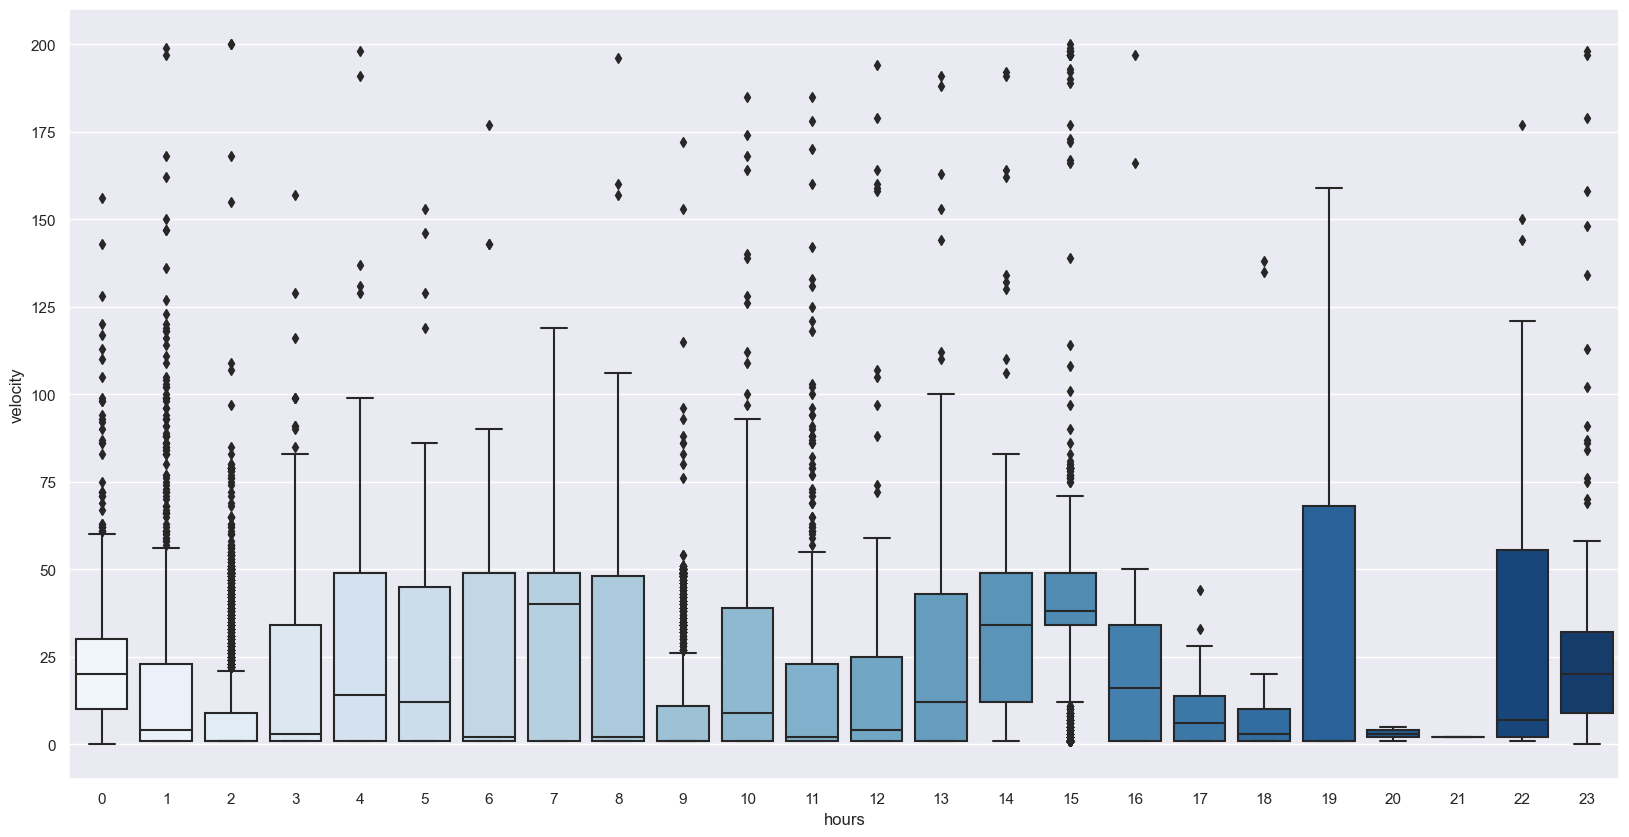

In [51]:
fig = plt.figure(figsize=(20,10))
sns.boxplot( y=df["velocity"], x=df["hours"], palette="Blues")
plt.show()

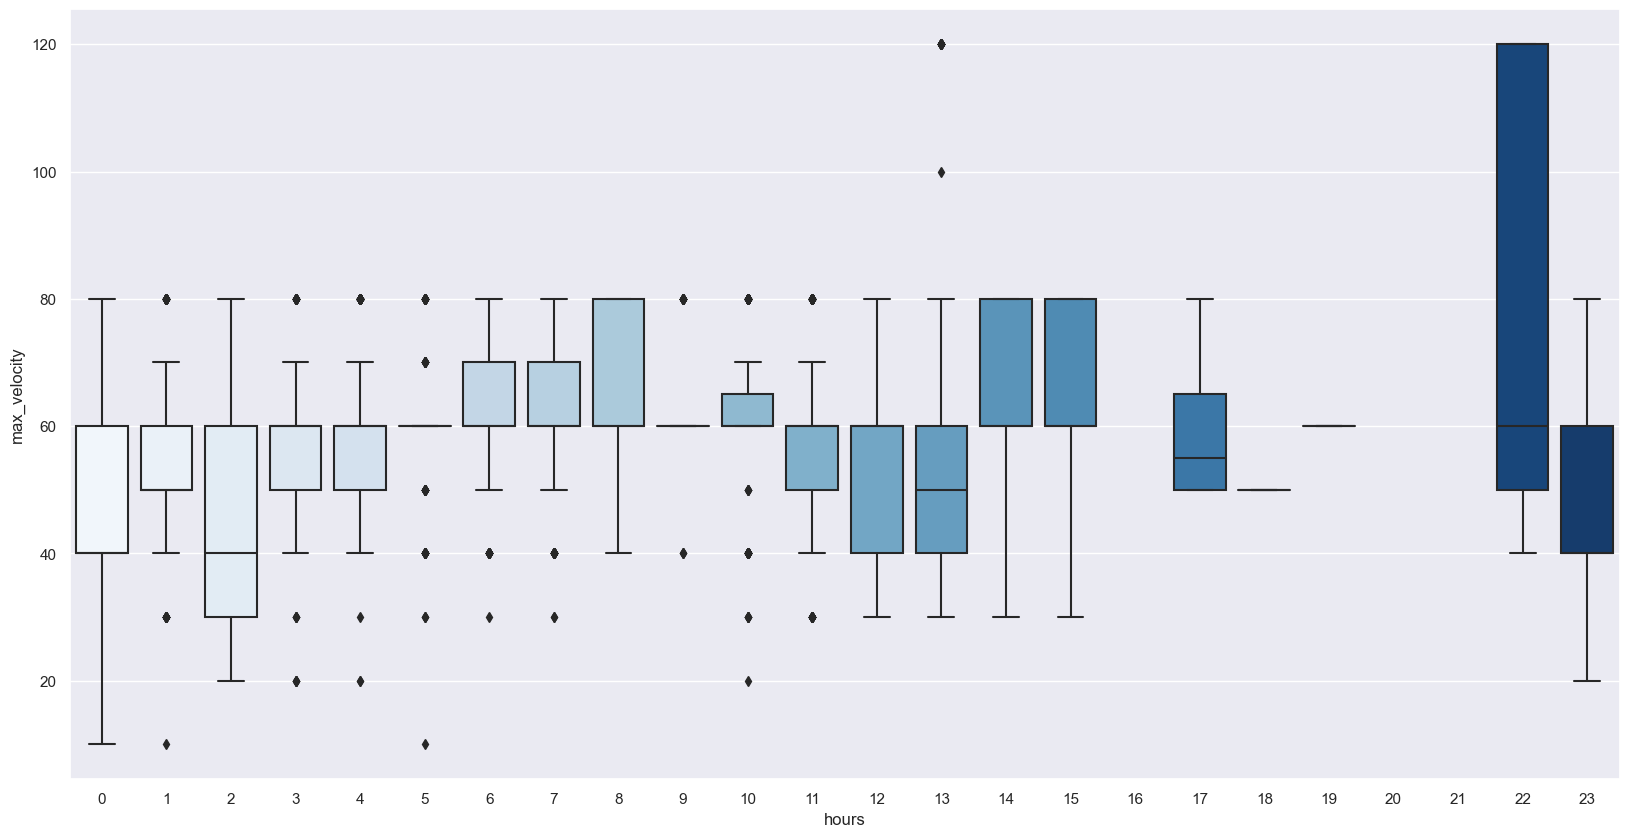

In [52]:
fig = plt.figure(figsize=(20,10))
sns.boxplot( y=df["max_velocity"], x=df["hours"], palette="Blues")
plt.show()

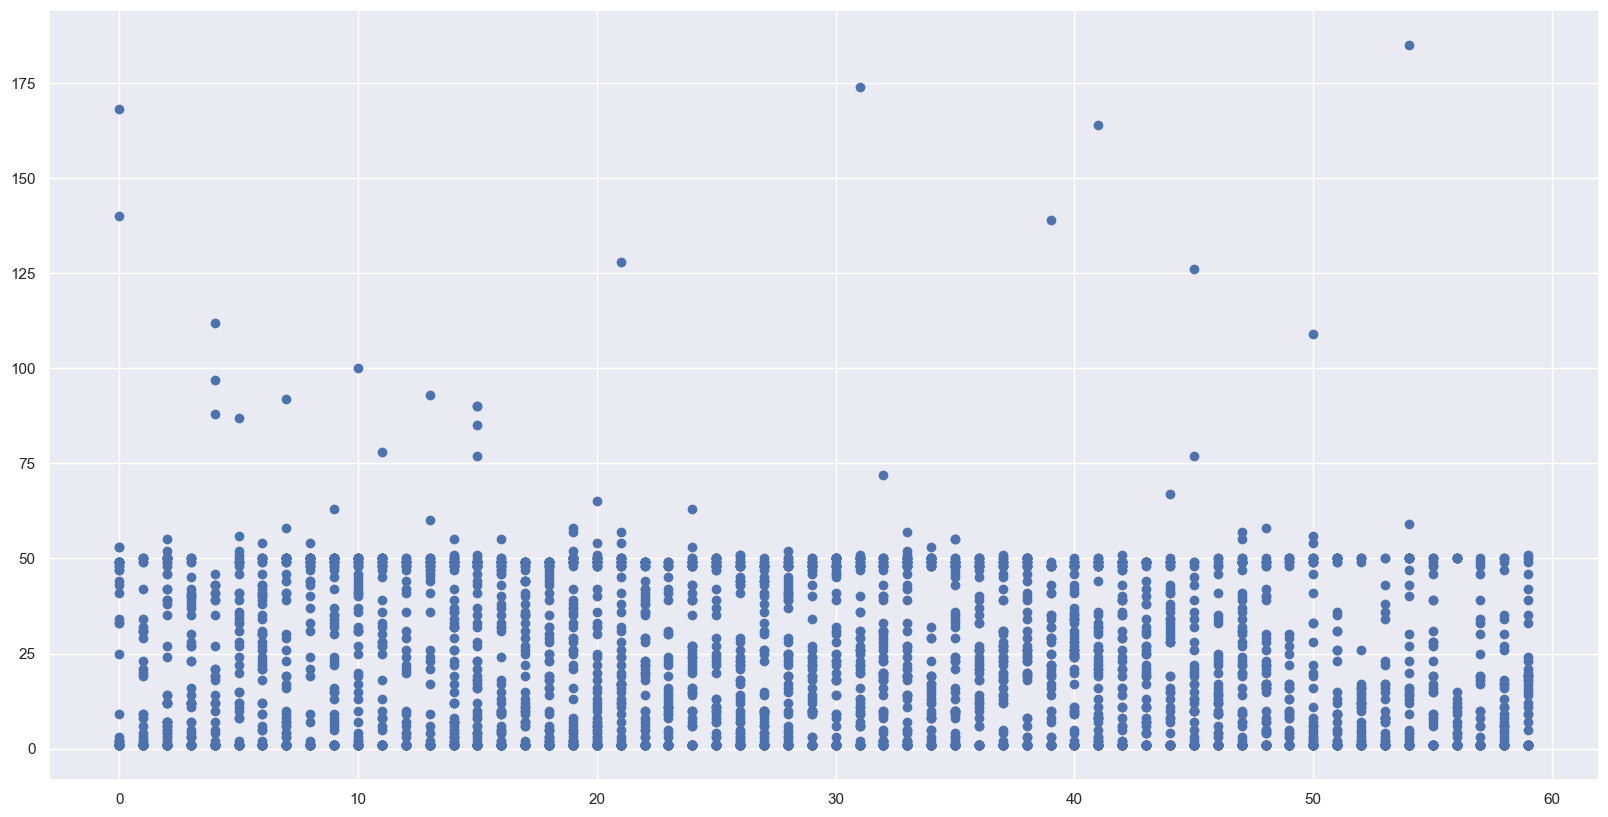

In [53]:
minuted = data.loc[data['hours'] == 10, ['hours', 'miniute', 'velocity']] 
fig = plt.figure(figsize=(20,10))
plt.scatter( y=minuted["velocity"], x=minuted["miniute"] );
plt.show()

In [54]:
data = data.loc[df['velocity'] < 80, :]

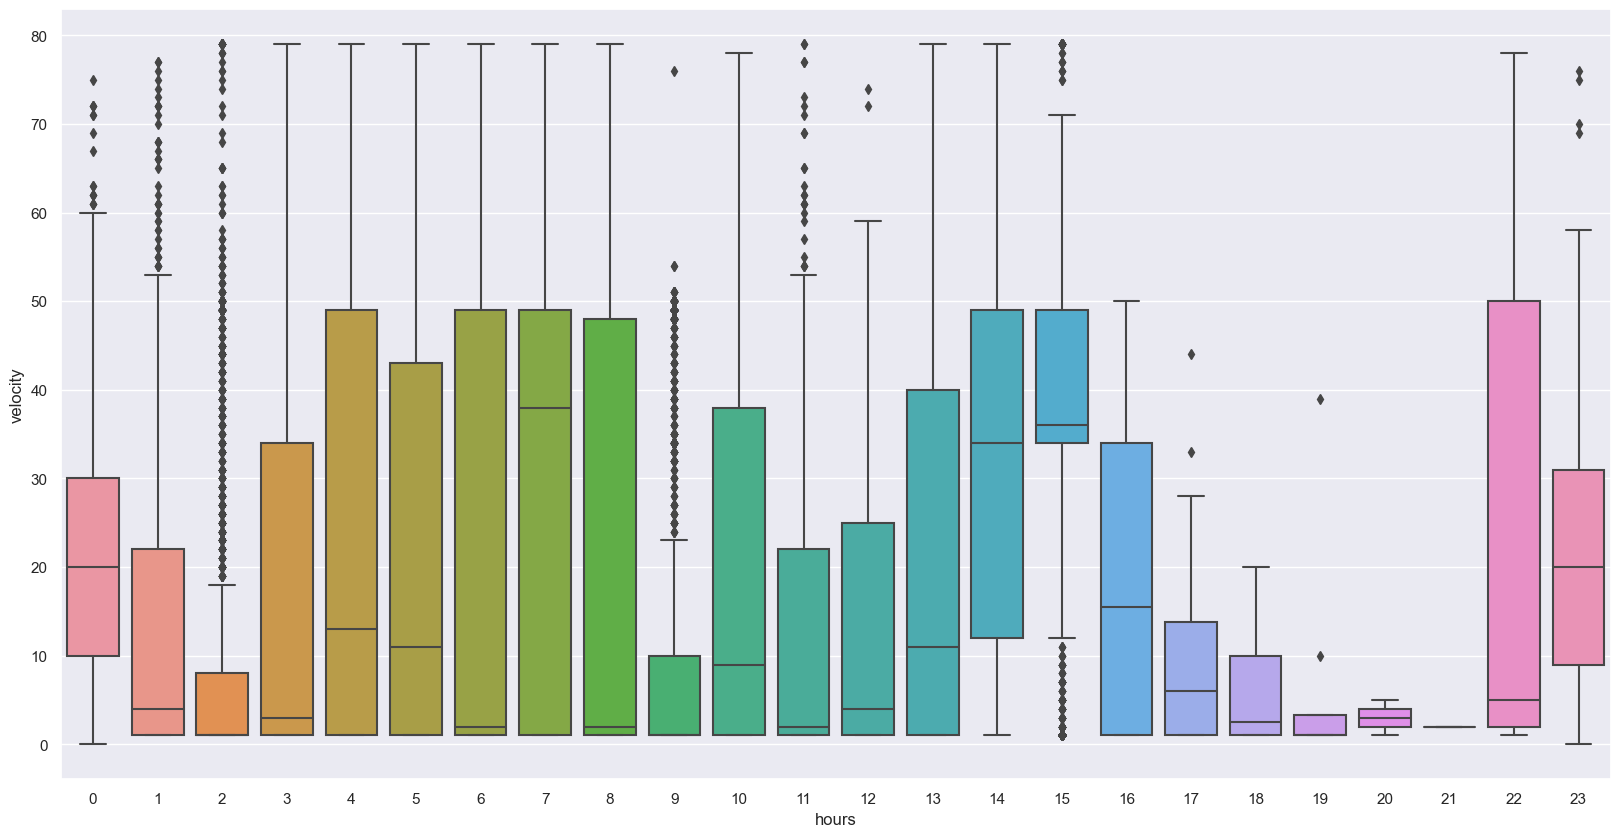

In [55]:
fig = plt.figure(figsize=(20,10))
sns.boxplot( y=data["velocity"], x=data["hours"] );
plt.show()

In [56]:
data['velocity'].describe()

count    90481.00000
mean        20.31842
std         18.46116
min          0.00000
25%          2.00000
50%         17.00000
75%         34.00000
max         79.00000
Name: velocity, dtype: float64

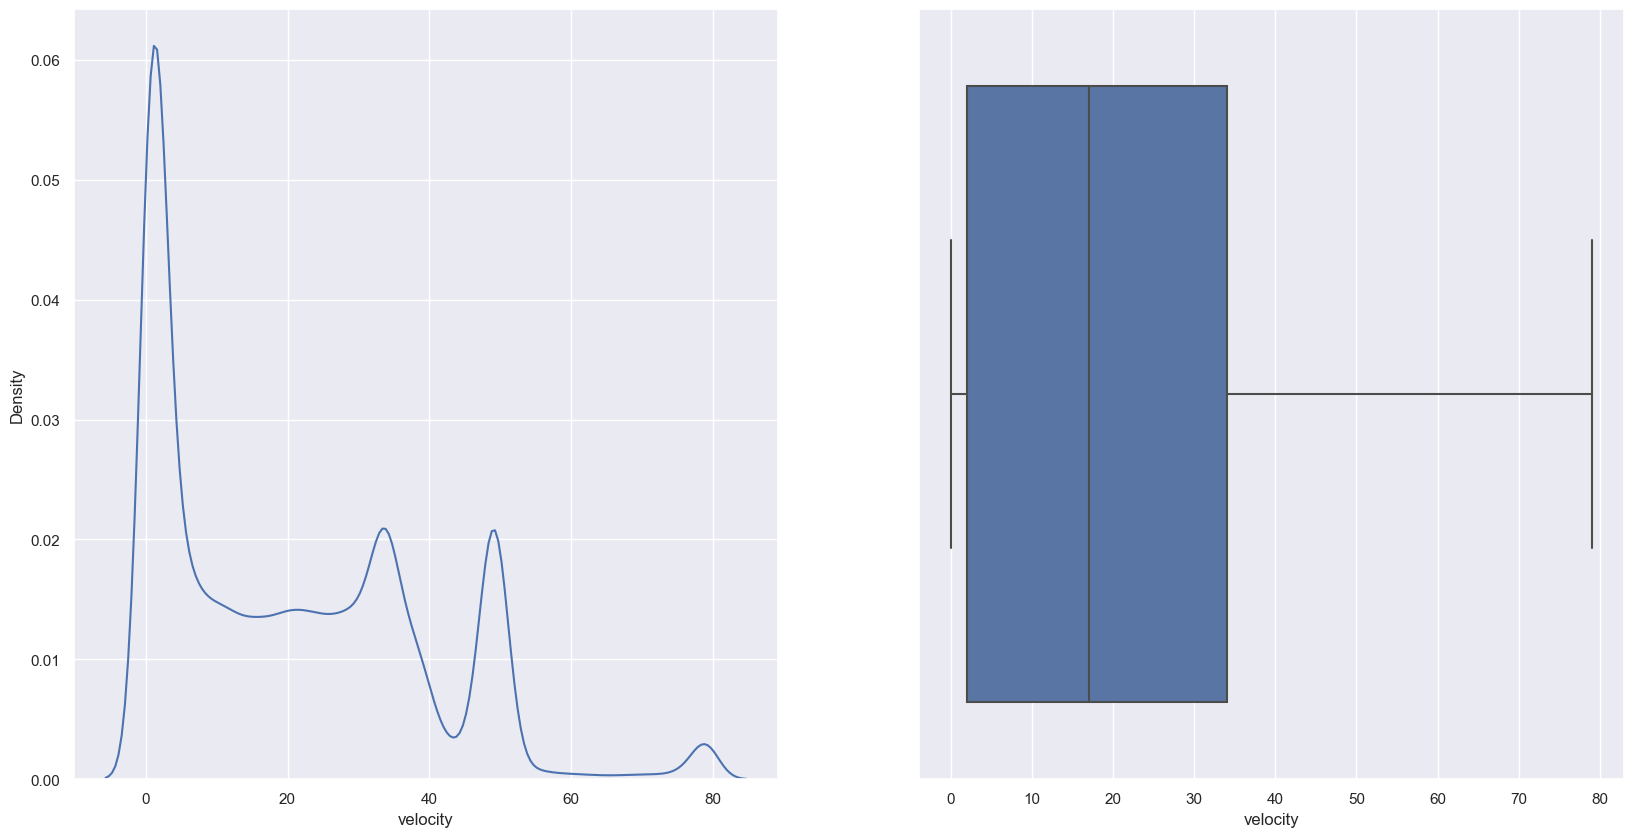

In [57]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.kdeplot(x = data['velocity'])
plt.subplot(1, 2, 2)
sns.boxplot(x = data['velocity'])
plt.show()

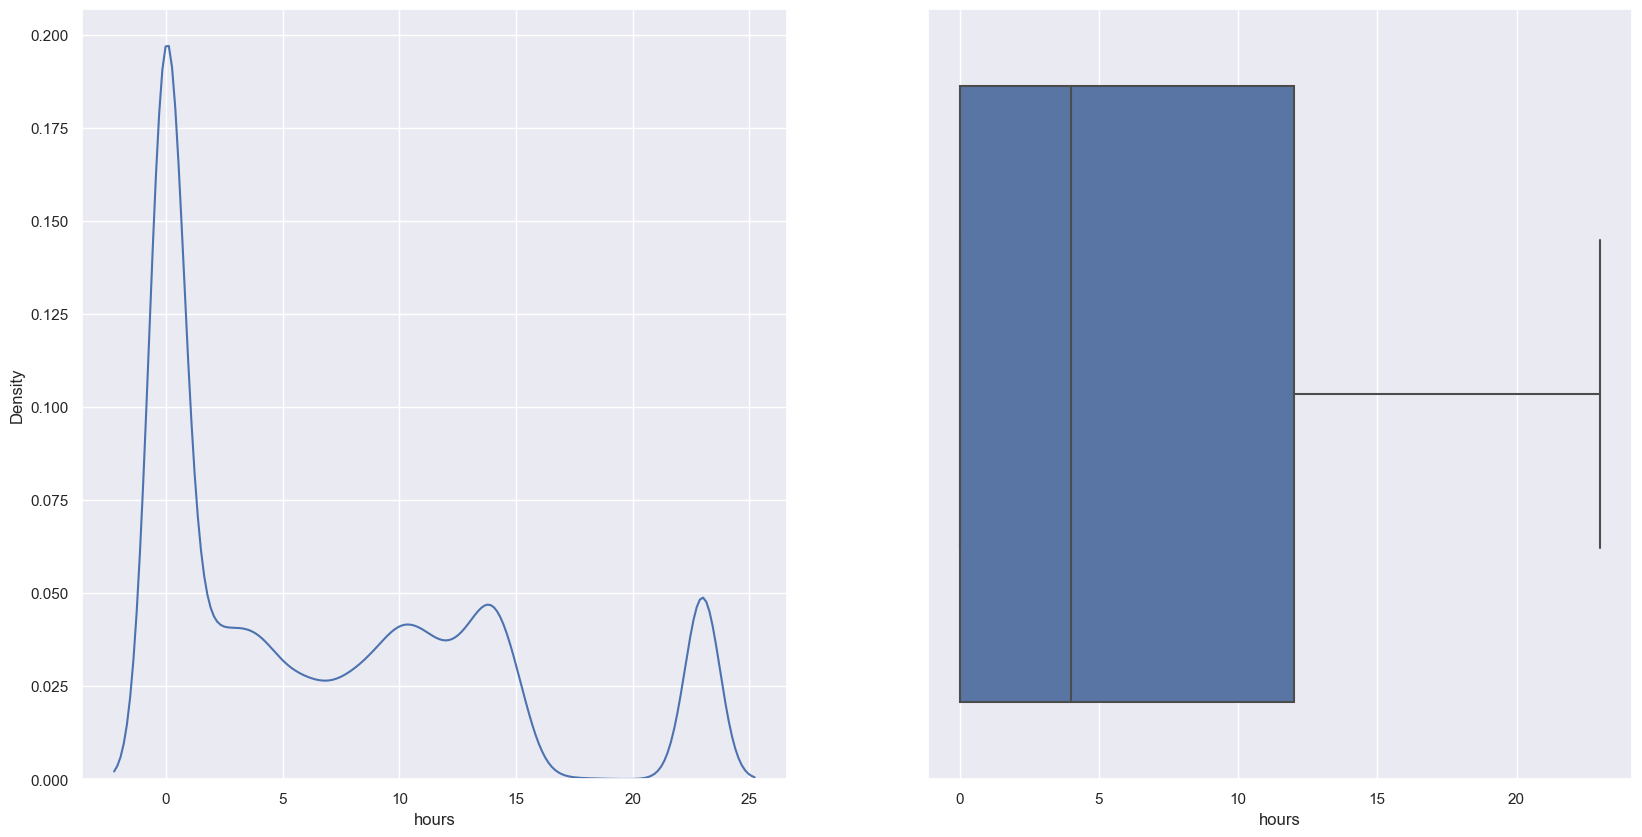

In [58]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.kdeplot(x = data['hours'])
plt.subplot(1, 2, 2)
sns.boxplot(x = data['hours'])
plt.show()

# Show data insights

<center><h1>Thời điểm kẹt xe trong ngày</h1></center>

In [59]:
mean_velocity_by_hour = data[['velocity', 'hours']].groupby('hours')['velocity'].mean()

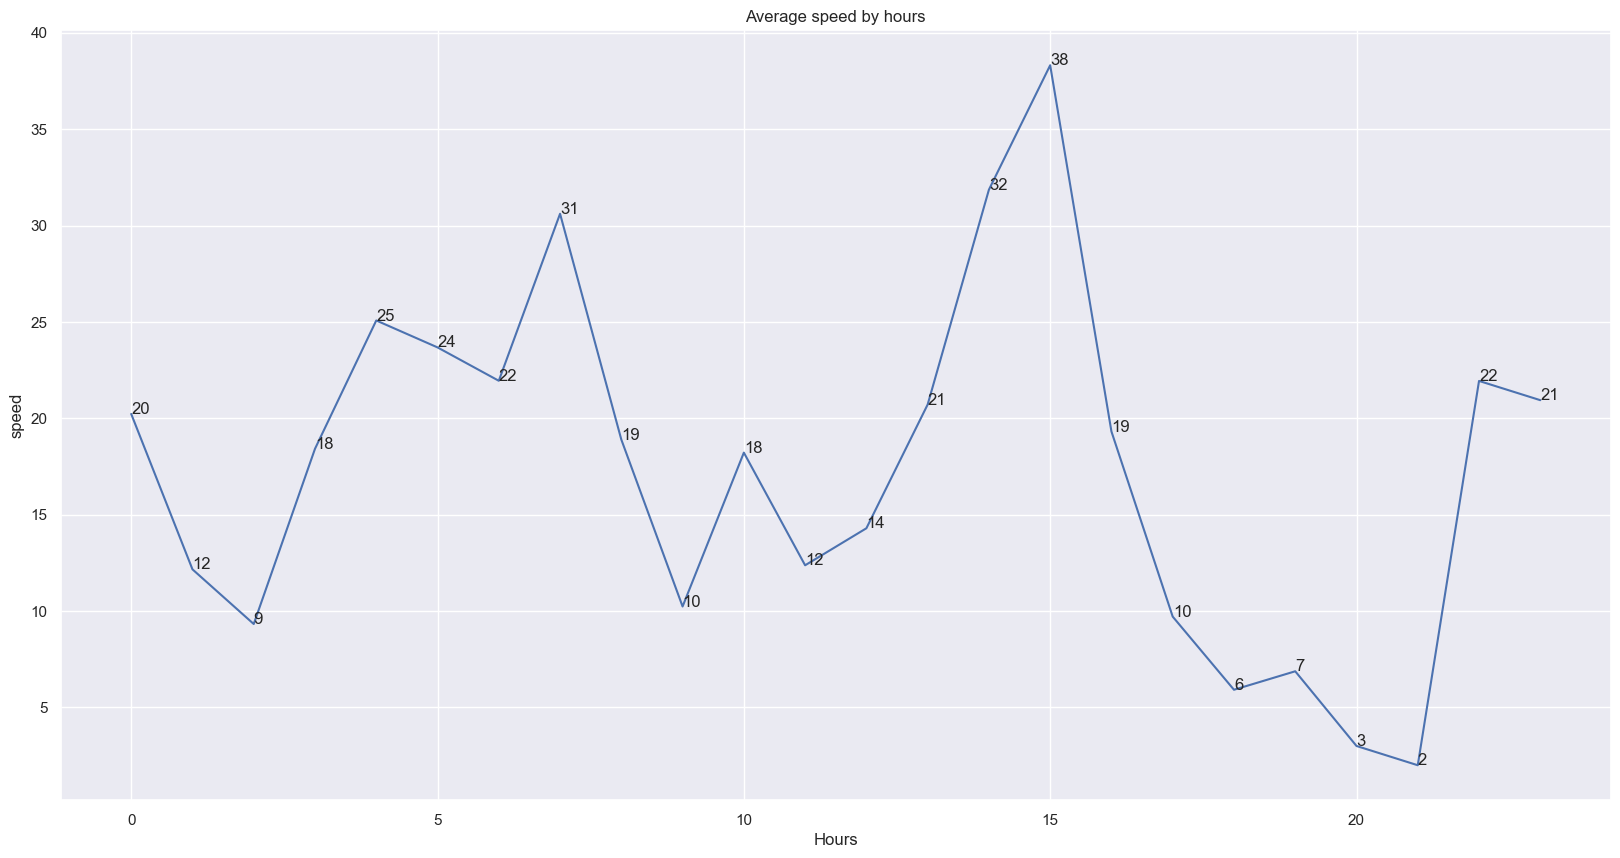

In [60]:
fig = plt.figure(figsize=(20,10))
plt.plot(mean_velocity_by_hour.index, mean_velocity_by_hour.values)
plt.rcParams['figure.figsize'] = (15, 10)
for x, y in zip(mean_velocity_by_hour.index, mean_velocity_by_hour.values):
    plt.text(x = x, y = y, s = '{:.0f}'.format(y))
plt.title('Average speed by hours')
plt.ylabel('speed')
plt.xlabel('Hours')
plt.show()

<h2>Nhận xét:</h2>
<p>Trong biểu đồ trên, trung bình vận tốc đạt ở 20km/h ở các khung h. hầu hết vận tộc dưới 10km/h đều nằm ở ở khung gờ từ 16h đến 21h. Điều này chứng tỏ tình trạng kẹt xe thường được xảy ra vào 16h đến 21h. Dựa vào tốc độ di chuyển của xe ta có thể đoán được mức độ kẹt xe là rất trầm trọng.</p>

<center><h1>Thời điểm kẹt xe trong tuần</h1></center>

In [61]:
weekTimeHours = data[['weekday', 'hours', 'velocity']].groupby(['weekday', 'hours'])['velocity'].mean().reset_index()

In [62]:
weekTimeHours.head()

weekday  hours   velocity
0        0      0  20.029336
1        0      1  19.933131
2        0      2   5.803435
3        0      3   1.223684
4        0      4  56.467890

In [63]:
import plotly.express as px

In [64]:
# x = sns.dark_palette("#69d", reverse=True, as_cmap=True)
# fig = plt.figure(figsize=(20,10))

# sns.lineplot(data=weekTimeHours, x="hours", y="velocity", hue="weekday", palette = x, linewidth=3)

# plt.show()

fig = px.line(weekTimeHours, x="hours", y="velocity", color='weekday')
fig.show()

<h3>Nhận xét:</h3>
<p>Trong sơ đồ này ta có thể nhìn thấy rằng: Tình trạng kẹt xe thường diễn ra vào giữa tuần. vào khoảng từ 16h đến 20h.</p>


In [65]:
weekTime = data.loc[(data['velocity'] >=17) & (data['hours'] <= 21), ['hours', 'velocity', 'weekday']]

In [66]:
week = weekTime.groupby(['weekday', 'hours'])['velocity'].mean().reset_index()

In [67]:
weekDay = data.loc[data['velocity'] < 15, ['weekday', 'hours', 'velocity']].groupby(['weekday', 'hours'])['velocity'].mean().reset_index()

In [68]:
weekDay.describe()

weekday       hours    velocity
count  138.000000  138.000000  138.000000
mean     3.007246    9.992754    3.602623
std      1.990842    6.347017    2.392884
min      0.000000    0.000000    1.000000
25%      1.000000    5.000000    1.703086
50%      3.000000   10.000000    3.102405
75%      5.000000   15.000000    4.743318
max      6.000000   23.000000   14.000000

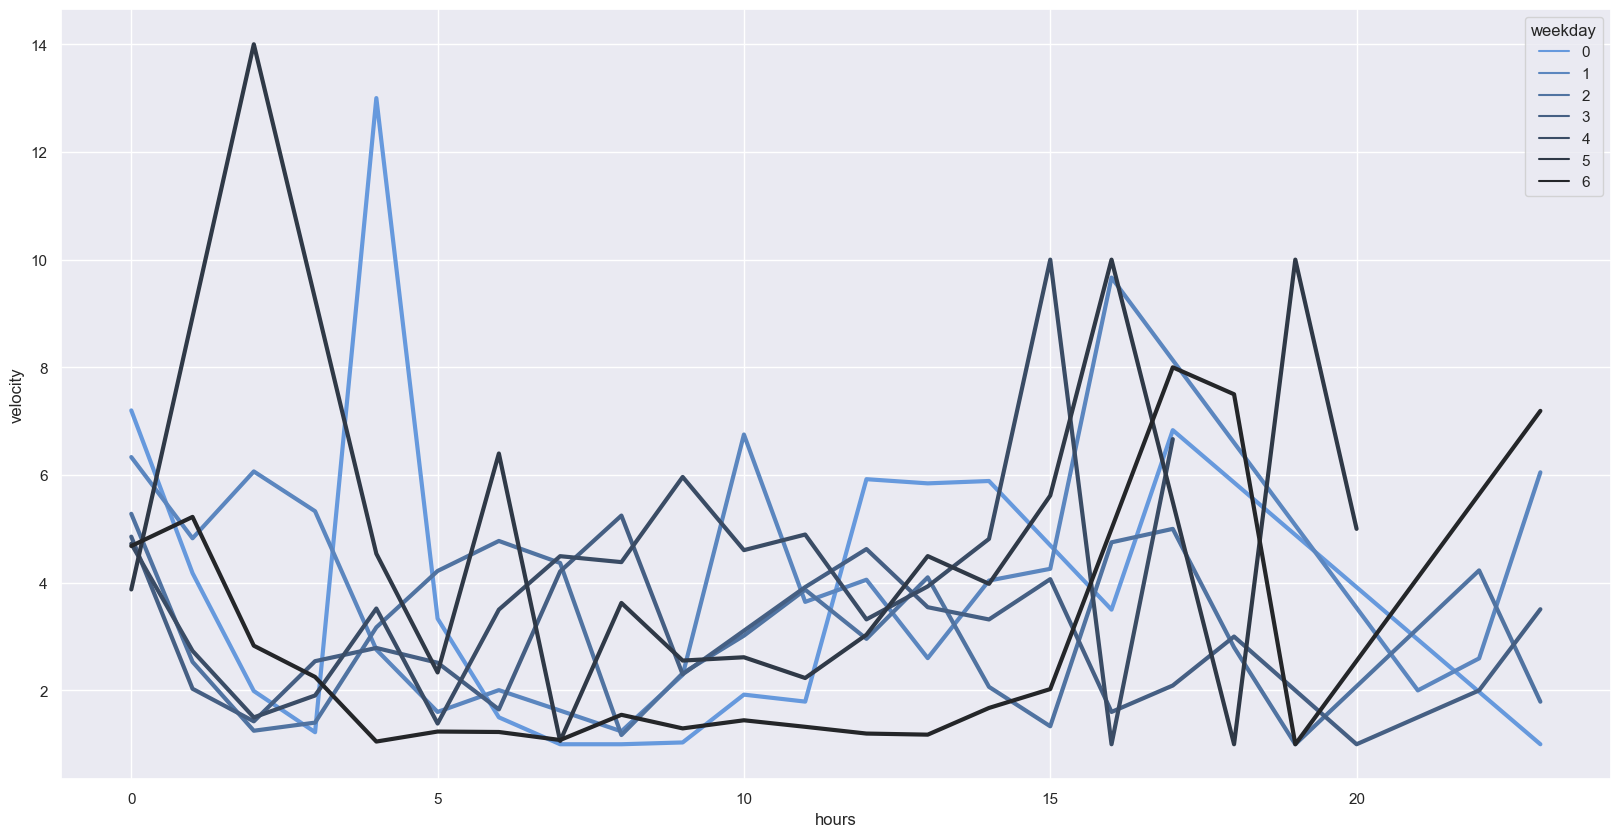

In [69]:
x = sns.dark_palette("#69d", reverse=True, as_cmap=True)
fig = plt.figure(figsize=(20,10))

sns.lineplot(data=weekDay, x="hours", y="velocity", hue="weekday", palette = x, linewidth=3)

plt.show()

In [70]:
data.loc[((data['hours'] > 9) & (data['hours'] < 11)), ['hours', 'velocity', 'long_x', 'lat_x', 'long_y', 'lat_y']]

hours  velocity      long_x      lat_x      long_y      lat_y
37        10        12  106.768605  10.881054  106.768412  10.880817
42        10         2  106.768412  10.880817  106.768267  10.880664
43        10        35  106.768412  10.880817  106.768267  10.880664
189       10        26  106.651043  10.784920  106.651362  10.784886
192       10        26  106.651043  10.784920  106.651362  10.784886
...      ...       ...         ...        ...         ...        ...
90408     10        13  106.682100  10.800973  106.682020  10.800897
90413     10         4  106.681254  10.800166  106.680457  10.799394
90414     10        31  106.681254  10.800166  106.680457  10.799394
90932     10        35  106.689289  10.780482  106.689519  10.780254
90936     10         7  106.689519  10.780254  106.689846  10.779960

[3986 rows x 6 columns]

In [71]:
data.columns

Index(['street_name', 'length', 'max_velocity', 'street_level', 'street_type',
       'long_x', 'lat_x', 'long_y', 'lat_y', 'updated_at_y', 'velocity',
       'weekday', 'hours', 'miniute'],
      dtype='object')

In [72]:
x = data.loc[((data['hours'] > 5) & (data['hours'] < 11)), ['hours', 'velocity']]

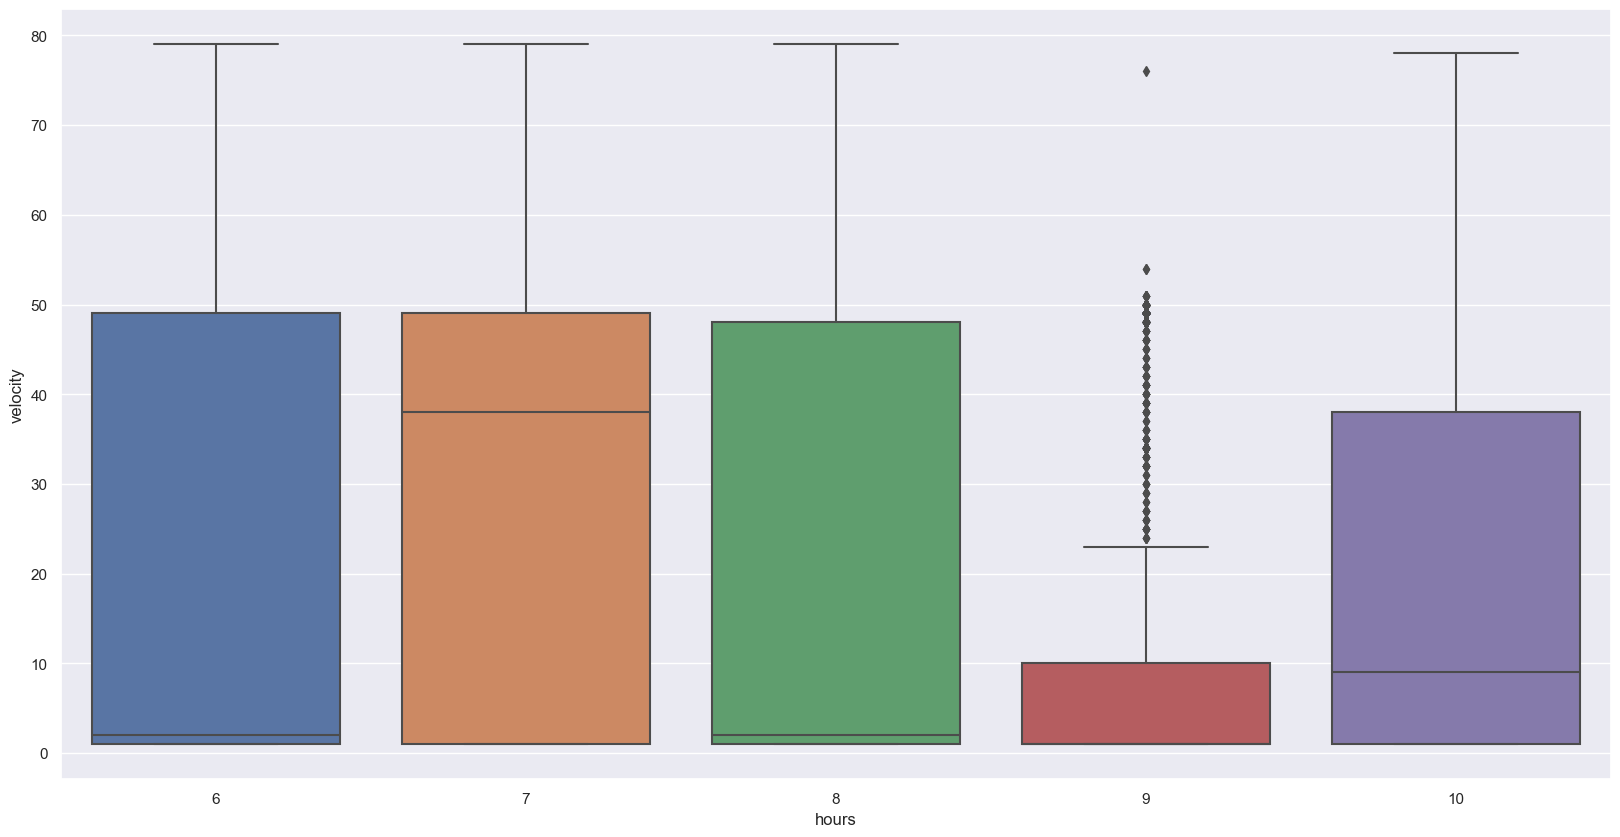

In [73]:
fig = plt.figure(figsize=(20,10))
sns.boxplot( y=x["velocity"], x=x["hours"] );
plt.show()

In [74]:
data.loc[((data['hours'] > 5) & (data['hours'] < 11)), ['hours', 'velocity', 'street_name', 'long_x', 'lat_x', 'long_y', 'lat_y']].loc[data['velocity'] < 15, ['street_name', 'long_x', 'lat_x', 'long_y', 'lat_y', 'velocity']]

street_name      long_x      lat_x      long_y      lat_y  \
37               Quốc lộ 1K  106.768605  10.881054  106.768412  10.880817   
42               Quốc lộ 1K  106.768412  10.880817  106.768267  10.880664   
173          Lý Thường Kiệt  106.653775  10.786033  106.653565  10.786770   
213           Đường Phú Hòa  106.654482  10.785806  106.653887  10.785640   
214           Đường Phú Hòa  106.654482  10.785806  106.653887  10.785640   
...                     ...         ...        ...         ...        ...   
90404         Phan Đăng Lưu  106.682518  10.801372  106.682100  10.800973   
90408         Phan Đăng Lưu  106.682100  10.800973  106.682020  10.800897   
90413         Phan Đăng Lưu  106.681254  10.800166  106.680457  10.799394   
90936        Trần Quốc Thảo  106.689519  10.780254  106.689846  10.779960   
90937  Nguyễn Thị Minh Khai  106.704503  10.789614  106.704584  10.789702   

       velocity  
37           12  
42            2  
173          14  
213           5  
214           5  
...         ...  
90404         7  
90408        13  
90413         4  
90936         7  
90937         1  

[8707 rows x 6 columns]

<h3>Nhận xét:</h3>
<p>Phần lớn các đoạn đường kẹt xe từ 5h đến 11h đều kẹt ở các ngã ba, ngã tư và giao lộ, hẻm. Có thể là các xe giảm tốc độ vì đèn đỏ hoặc là tránh va chạm xe. Không thể kết luận là kẹt xe.</p>
<p> Giữa tuần, vào khung giờ từ 16h đến 20h thì tình trạng kẹt xe nghiêm trọng hơn các ngày đầu tuần và cuối tuần trong</p>

<h2>Nhận xét chung về thời điểm kẹt xe trong tuần:</h2>
<p>Hầu như tình trạng kẹt xe đều xảy ra các ngày trong tuần. Nhưng vào thời điểm giữa tuần thì tình trạng kẹt xe được thể hiện rõ ràng hơn. Vận tốc của xe thấp thường xảy ra vào khoảng thời gian từ 9h-12h và 16h-20h.<br>
Phần lớn vào khoảng thời gian từ 9-12h vận tốc thấp nằm ở các đoạn đường giao lộ, ngã tư và đoạn đường kẹt cũng ngắn. Vì thế ta không xác định được vào thời điểm đó là kẹt.<br>
Ngược lại vào khoản thời gian từ 19h-20h đoạn vận tốc thấp trên diện rộng bắt đầu từ ngã tư. nên vì thế ta xác định khoảng thời gian này là khoảng thời gian kẹt xe nhất trong ngày.</p>

In [75]:
data['month'] = data['updated_at_y'].dt.month

In [76]:
data['month']

0        12
3         8
4         8
5         8
6         8
         ..
90933    11
90934    11
90935    11
90936     1
90937     1
Name: month, Length: 90481, dtype: int64

<center><h1>Tình trạng kẹt xe thường xảy ra với các kiểu đường</h1></center>

In [77]:
avg_street = data.loc[(data['hours'] >16) & (data['hours'] < 21), ['street_type', 'velocity', 'length']].groupby('street_type')[['length', 'velocity']].mean().reset_index()

In [78]:
avg_street

street_type     length   velocity
0       primary  38.714286   8.928571
1   residential   8.000000  38.500000
2      tertiary  45.000000   7.142857
3         trunk  73.200000   4.400000
4  unclassified  44.675676   6.702703

In [79]:
data['length'].describe()

count    90481.000000
mean        44.966877
std         45.669752
min          0.000000
25%         16.000000
50%         32.000000
75%         62.000000
max       1011.000000
Name: length, dtype: float64

In [80]:
x = data.loc[(data['hours'] >16) & (data['hours'] < 21), ['street_type', 'velocity', 'length']]

<AxesSubplot:xlabel='street_type', ylabel='velocity'>

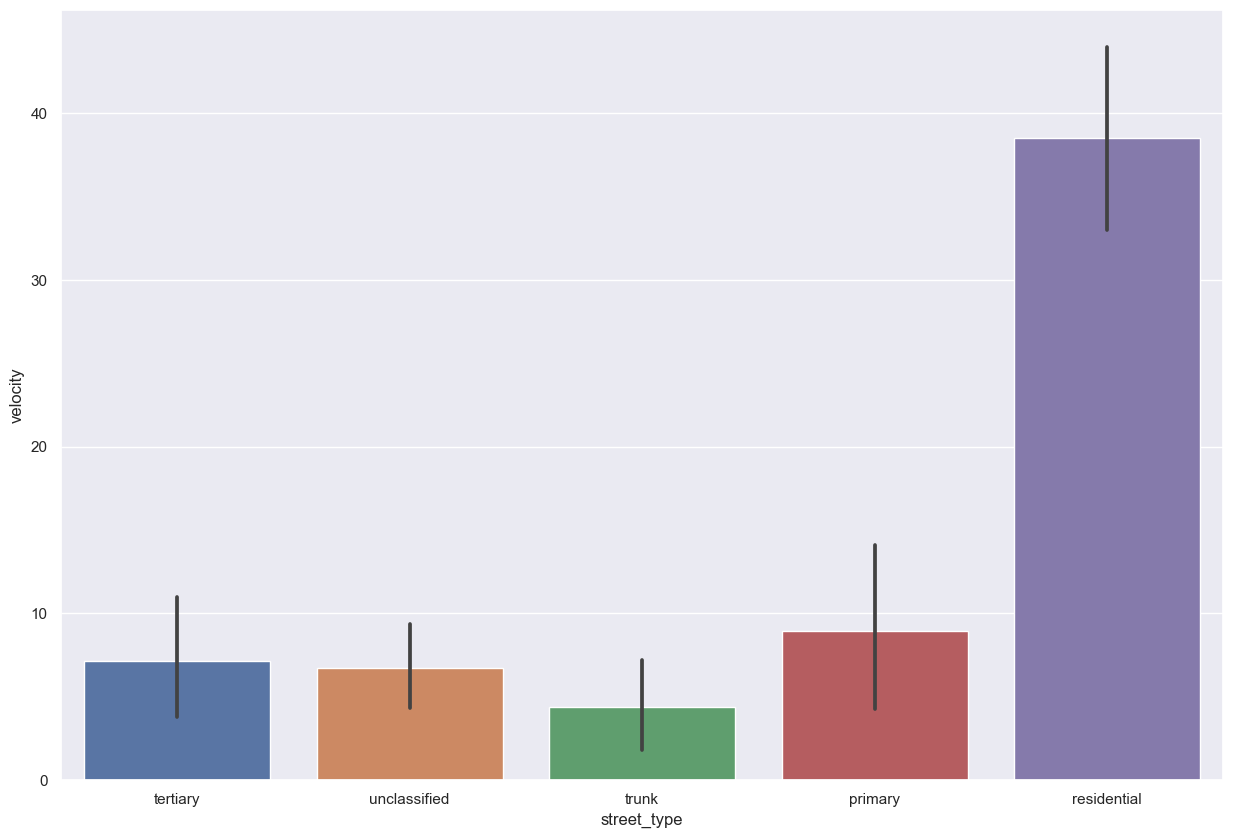

In [81]:
sns.barplot(data=x, x="street_type", y="velocity")

<h2>Nhận xét:</h2>
<p>Phần lớn tình trạng kẹt xe xảy ra ở các kiểu đường tertiary, unclassifued, trunk, primary</p>

<h1>Solution</h1>
<p>short term solution: Vào các giờ cao điểm thì các ngã tư, ngã ba ở đèn đỏ sẽ không sử dụng thay vào đó là đèn vàng. Và bố trí nhân viên điều tiết giao thông ở đó.<br>
    long term solution: Thay đổi khung giờ giữa người đi làm và người đi học. Khuyến khích người đi làm đi bằng tàu điện khi được hoàn thành hoặc xe buýt. Di tản dân cư...</p>

# Model Predict.

In [145]:
def classification(agurment_1, agurment_2):
    cl = ''
    if (agurment_1 >= 30) & (agurment_2 <= 15):
        cl = 1
    else:
        cl = 0
    return cl

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
data.head()

street_name  length  max_velocity  street_level   street_type  \
0      Chu Văn An      30           NaN             4  unclassified   
3  Nguyễn Thị Nhỏ      18           NaN             4      tertiary   
4  Nguyễn Thị Nhỏ      18           NaN             4      tertiary   
5  Nguyễn Thị Nhỏ      18           NaN             4      tertiary   
6  Nguyễn Thị Nhỏ      18           NaN             4      tertiary   

       long_x      lat_x      long_y      lat_y  \
0  106.704566  10.811195  106.704842  10.811203   
3  106.652513  10.769557  106.652479  10.769398   
4  106.652513  10.769557  106.652479  10.769398   
5  106.652513  10.769557  106.652479  10.769398   
6  106.652513  10.769557  106.652479  10.769398   

                      updated_at_y  velocity  weekday  hours  miniute  month  
0 2020-12-19 13:09:47.883000+00:00         8        5     13        9     12  
3 2020-08-02 23:56:28.021000+00:00        12        6     23       56      8  
4 2020-08-02 23:59:28.138000+00:00        34        6     23       59      8  
5 2020-08-03 00:02:28.072000+00:00        12        0      0        2      8  
6 2020-08-03 00:05:28.206000+00:00        31        0      0        5      8

In [128]:
train = data[['length', 'street_level', 'street_type', 'velocity', 'weekday', 'hours', 'street_name']]

In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90481 entries, 0 to 90937
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   length        90481 non-null  int64 
 1   street_level  90481 non-null  int64 
 2   street_type   90481 non-null  object
 3   velocity      90481 non-null  int64 
 4   weekday       90481 non-null  int64 
 5   hours         90481 non-null  int64 
 6   street_name   90480 non-null  object
dtypes: int64(5), object(2)
memory usage: 7.5+ MB


In [146]:
train['y/n'] = train.apply(lambda x: classification(x['length'], x['velocity']), axis =1)

C:\Users\ACER\AppData\Local\Temp\ipykernel_17472\3555047592.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
train['y/n'].value_counts()

0    67458
1    23023
Name: y/n, dtype: int64

In [132]:
train.head()

length  street_level   street_type  velocity  weekday  hours  \
0      30             4  unclassified         8        5     13   
3      18             4      tertiary        12        6     23   
4      18             4      tertiary        34        6     23   
5      18             4      tertiary        12        0      0   
6      18             4      tertiary        31        0      0   

      street_name  y/n  
0      Chu Văn An  yes  
3  Nguyễn Thị Nhỏ   no  
4  Nguyễn Thị Nhỏ   no  
5  Nguyễn Thị Nhỏ   no  
6  Nguyễn Thị Nhỏ   no

In [133]:
from sklearn import preprocessing

In [134]:
le = preprocessing.LabelEncoder()

In [141]:
le.fit(train['street_type'])
train['street_type_label'] = le.transform(train['street_type'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_17472\2575572163.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
le.fit(train['street_name'])
train['street_name_label'] = le.transform(train['street_name'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_17472\213914642.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [148]:
train

length  street_level   street_type  velocity  weekday  hours  \
0          30             4  unclassified         8        5     13   
3          18             4      tertiary        12        6     23   
4          18             4      tertiary        34        6     23   
5          18             4      tertiary        12        0      0   
6          18             4      tertiary        31        0      0   
...       ...           ...           ...       ...      ...    ...   
90933      48             4      tertiary        20        0      1   
90934      48             4      tertiary        27        1      1   
90935      48             4      tertiary        29        3      2   
90936      48             4      tertiary         7        1     10   
90937      13             2       primary         1        1      8   

                street_name  y/n  street_name_label  street_type_label  
0                Chu Văn An    1                 29                 24  
3            Nguyễn Thị Nhỏ    0                293                 20  
4            Nguyễn Thị Nhỏ    0                293                 20  
5            Nguyễn Thị Nhỏ    0                293                 20  
6            Nguyễn Thị Nhỏ    0                293                 20  
...                     ...  ...                ...                ...  
90933        Trần Quốc Thảo    0                478                 20  
90934        Trần Quốc Thảo    0                478                 20  
90935        Trần Quốc Thảo    0                478                 20  
90936        Trần Quốc Thảo    1                478                 20  
90937  Nguyễn Thị Minh Khai    0                290                 14  

[90481 rows x 10 columns]

In [149]:
from sklearn.model_selection import train_test_split

In [171]:
X = train.drop(['street_type', 'street_name', 'y/n'], axis = 1)
y = train['y/n']

In [172]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape )

(72384, 7) (18097, 7) (72384,) (18097,)


In [173]:
model = LinearRegression()

In [174]:
model.fit(X_train, y_train)

LinearRegression()

In [175]:
y_pred = model.predict(X_test)

In [176]:
y_pred

array([0.21937578, 0.63086518, 0.13123919, ..., 0.67944966, 0.25906638,
       0.31580834])

In [177]:
## tính toán R2 của model
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, model.predict(X_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y_test, y_pred)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))

print("\n") # xuống dòng
print("Đánh giá năng lực dự báo trung bình trên tập test")
print('Sai số dự báo trung bình:', metrics.mean_absolute_error(y_test, y_pred)) 

R2 trên tập huấn luyện của model là:0.3938195012636462
R2 trên tập kiểm tra của model là:0.38841698935398905


Đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình: 0.2850283776605395


In [191]:
x = [[  3,   2,  27,   0,   0, 370,  14]]
y_pred = model.predict(x)
y_pred

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([0.04332474])